Fatmi Firdaous
# Handwritten Digit Recognition with TensorFlow
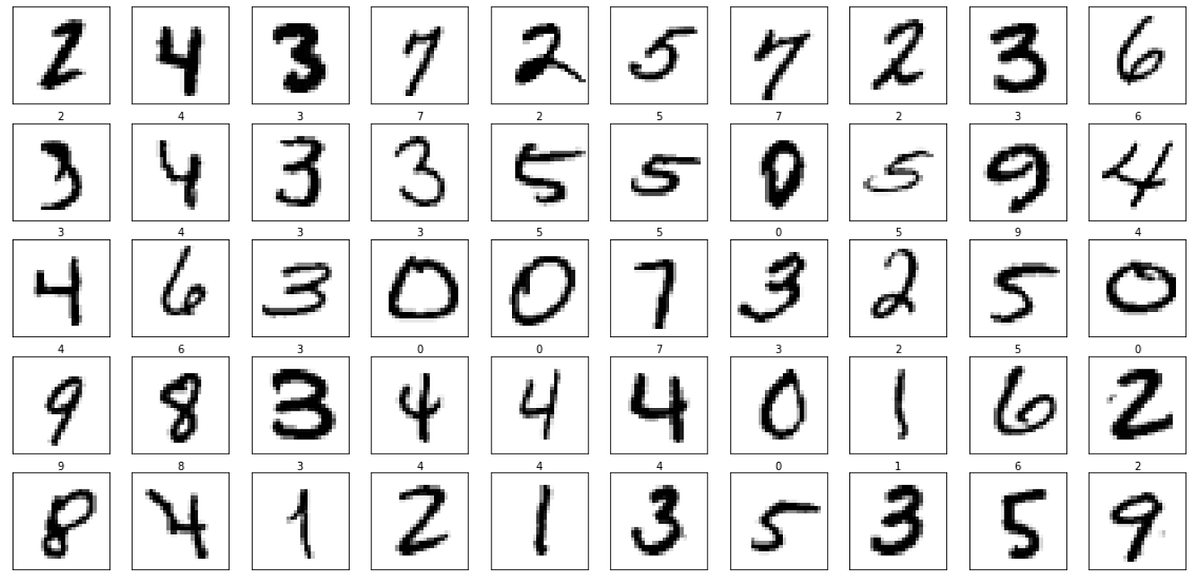



In this lab, goal is to use a fully-connected neural network to recognize handwritten digits. To do so, we will train our model on the MNIST dataset, which consists of 70,000 28 by 28 pixels grayscale images of zip code digits annotated by their corresponding labels

### 1. Data Preprocessing
#### Import necassary packages

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, optimizers
pip install tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, optimizers

#### Load MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

#### Normalize Pixel Values

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

 ### Display Sample Images

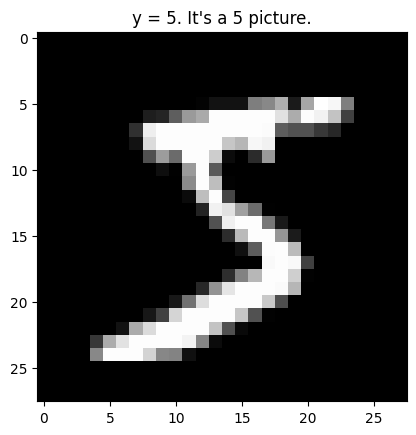

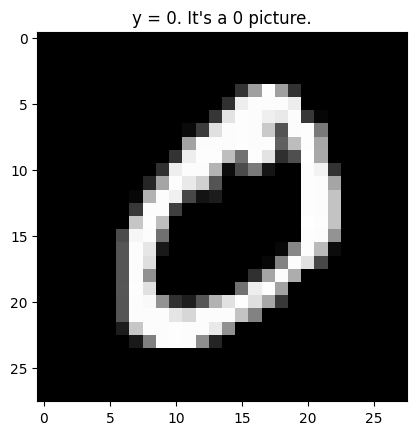

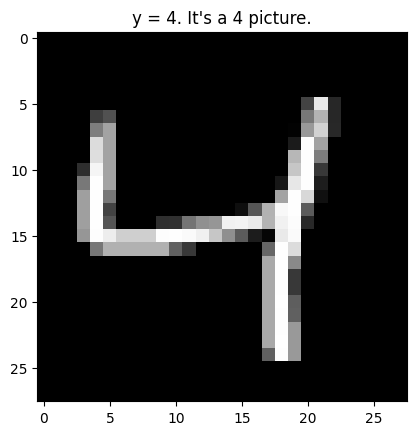

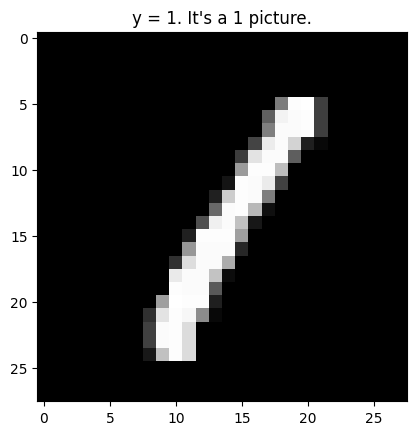

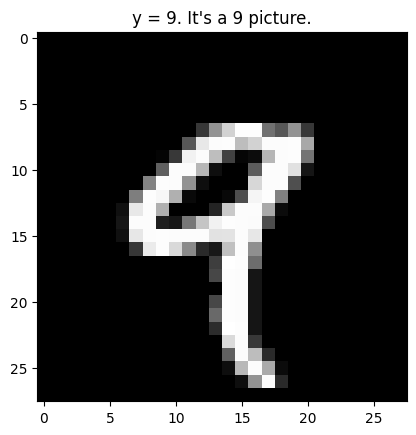

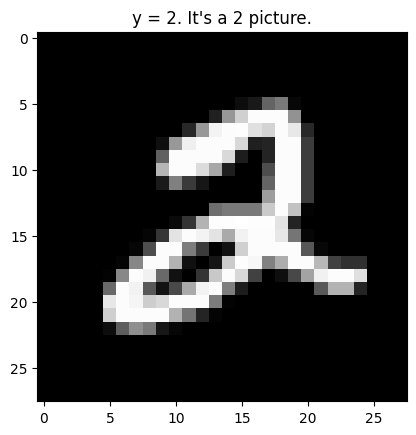

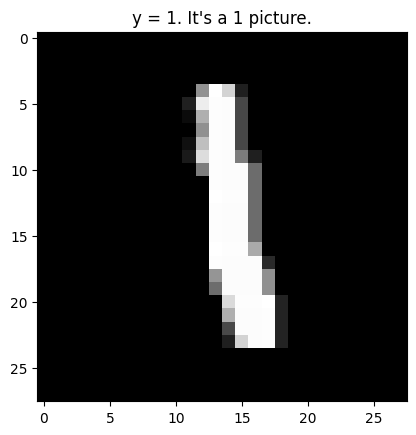

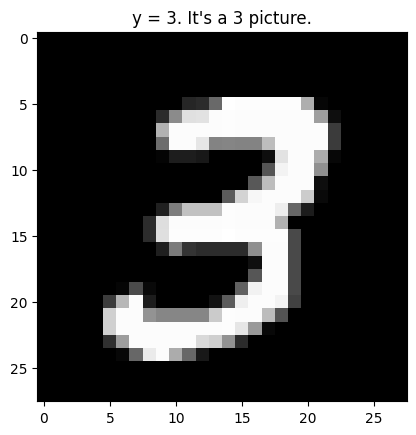

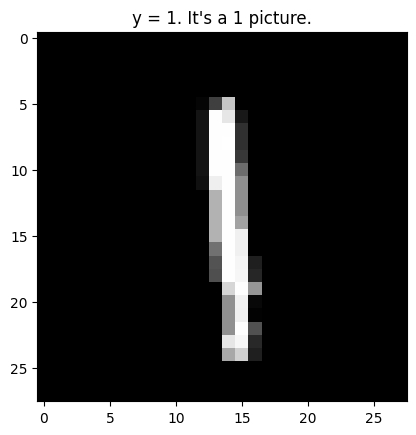

In [7]:
for index in range(0,9):
  plt.imshow(x_train[index], cmap='gray')
  plt.title(f"y = {y_train[index]}. It's a {y_train[index]} picture.")
  plt.show()

In [8]:
y_train[0]

5

####One-Hot Encode Labels

In [9]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

###2. Model Architecture

####Single-Layer Neural Network

In [13]:
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

number of parameters is : 7850

### 3. Model Training & Evaluation

####Train the Model

In [15]:
optimizer = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
validation_split = 0.25
num_validation_samples = int(validation_split * x_train.shape[0])

In [17]:
x_train, x_val = x_train[:-num_validation_samples], x_train[-num_validation_samples:]
y_train_one_hot, y_val_one_hot = y_train_one_hot[:-num_validation_samples], y_train_one_hot[-num_validation_samples:]

In [18]:
history = model.fit(x_train, y_train_one_hot,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_val, y_val_one_hot))


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6768 - loss: 1.2448 - val_accuracy: 0.8701 - val_loss: 0.5303
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8689 - loss: 0.5210 - val_accuracy: 0.8858 - val_loss: 0.4372
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8817 - loss: 0.4457 - val_accuracy: 0.8938 - val_loss: 0.3991
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8926 - loss: 0.4025 - val_accuracy: 0.8983 - val_loss: 0.3770
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8927 - loss: 0.3952 - val_accuracy: 0.9011 - val_loss: 0.3628
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8974 - loss: 0.3738 - val_accuracy: 0.9029 - val_loss: 0.3524
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8993 - loss: 0.3628 - val_accuracy: 0.9051 - val_loss: 0.3445
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9010 - loss: 0.3468 

####Plot model accuracy

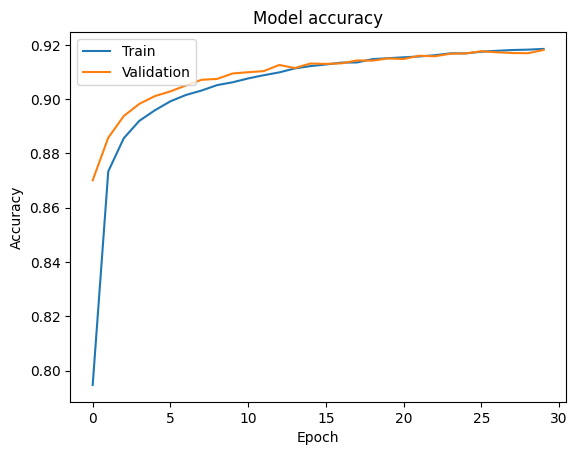

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

this plot presents the training and validation accuracy trends. Key points:
- The training accuracy starts lower and gradually improves, converging with the validation accuracy.
- The validation accuracy is slightly higher than the training accuracy in some instances, suggesting good generalization.
- Both accuracies stabilize at around 92%, indicating that the model has achieved a high level of performance.

####Plot model loss

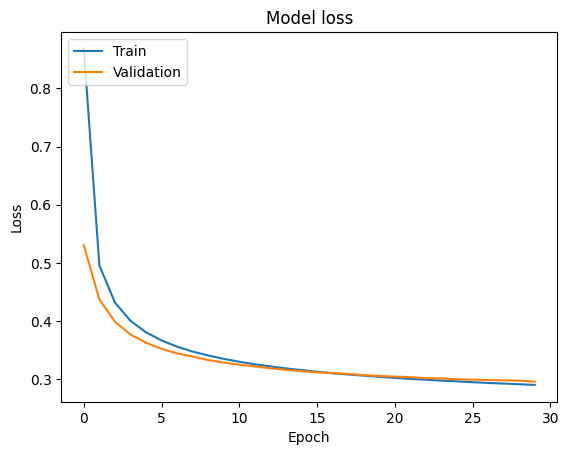

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

it's shows the training and validation loss over epochs. Key observations:
- The training loss and validation loss both decrease over time.
- The validation loss closely follows the training loss, indicating that the model is generalizing well.
- There is no sign of overfitting, as both losses stabilize and converge towards the same value.

###4.Improving model's performance

By adding a one more hidden layer (ReLu)

####Deep Neural Network Architecture

In [32]:
model2 = models.Sequential([layers.InputLayer(input_shape=(28, 28)),layers.Flatten(),layers.Dense(64, activation='relu'),layers.Dense(10, activation='softmax')])
optimizer = optimizers.SGD(learning_rate=0.01)
model2.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [44]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,892 (198.80 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


*   First hidden layer 50 240 parameters
*   Second hidden layer 650 parameters



In [34]:
# Train the model
history2 = model2.fit(x_train, y_train_one_hot,epochs=30,batch_size=32,validation_data=(x_val, y_val_one_hot))

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9744 - loss: 0.0944 - val_accuracy: 0.9623 - val_loss: 0.1306
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.0972 - val_accuracy: 0.9636 - val_loss: 0.1281
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9758 - loss: 0.0903 - val_accuracy: 0.9645 - val_loss: 0.1266
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9753 - loss: 0.0902 - val_accuracy: 0.9647 - val_loss: 0.1257
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9777 - loss: 0.0857 - val_accuracy: 0.9653 - val_loss: 0.1229
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9776 - loss: 0.0836 - val_accuracy: 0.9653 - val_loss: 0.1225
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9767 - loss: 0.0850 - val_accuracy: 0.9653 - val_loss: 0.1205
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9781 - loss: 0.0829 -

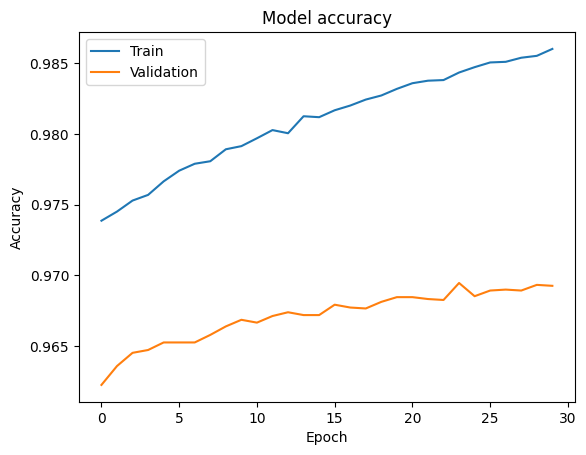

In [36]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Training accuracy steadily improves from about 0.974 to 0.986
Validation accuracy increases from about 0.962 to 0.969
The widening gap between training and validation accuracy (especially after epoch 15) confirms the overfitting observed in the loss plot

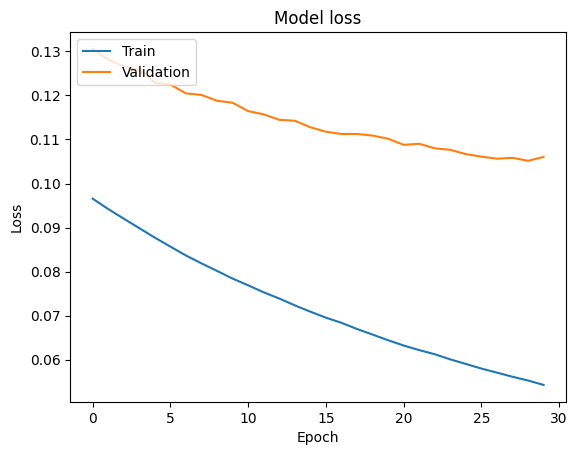

In [37]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Both training and validation loss decrease consistently over time, which is positive
Training loss starts around 0.097 and drops to about 0.055
Validation loss starts higher at about 0.122 and decreases to about 0.105
The persistent gap between training and validation loss indicates some overfitting

In [38]:
y_pred = model2.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


###5. Error Analysis

####Identify Incorrect Predictions

In [39]:
incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]

####Visualize Errors

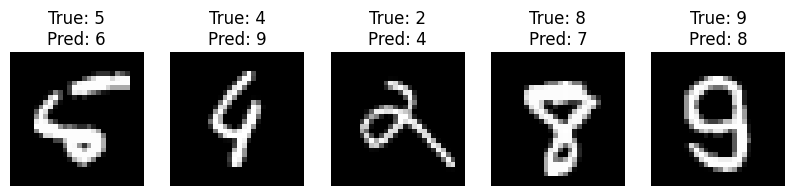

In [42]:
num_images = 5
plt.figure(figsize=(10, 5))
for i, incorrect_index in enumerate(incorrect_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[incorrect_index], cmap='gray')
    plt.title(f"True: {y_true_labels[incorrect_index]}\nPred: {y_pred_labels[incorrect_index]}")
    plt.axis('off')
plt.show()

In [43]:
for i, incorrect_index in enumerate(incorrect_indices[:num_images]):
    print(f"Image {i + 1}")
    print(f"True label: {y_true_labels[incorrect_index]}")
    print(f"Predicted label: {y_pred_labels[incorrect_index]}")
    print(f"Predicted probabilities: {y_pred[incorrect_index]}\n")

Image 1
True label: 5
Predicted label: 6
Predicted probabilities: [1.2402554e-04 1.8357583e-06 1.7413396e-03 8.5899740e-07 9.0242247e-06
 9.7546719e-02 8.9887905e-01 2.2725614e-07 1.1179823e-03 5.7890749e-04]

Image 2
True label: 4
Predicted label: 9
Predicted probabilities: [3.5693619e-04 6.0490269e-04 3.1797451e-03 4.3079202e-04 3.2660031e-01
 8.5749076e-04 2.0536670e-02 2.5568679e-03 1.4218563e-03 6.4345431e-01]

Image 3
True label: 2
Predicted label: 4
Predicted probabilities: [0.00033588 0.00461935 0.1939548  0.02617009 0.30212873 0.0791527
 0.00840835 0.00041172 0.14209221 0.24272616]

Image 4
True label: 8
Predicted label: 7
Predicted probabilities: [1.1432022e-06 1.6588517e-08 1.0376684e-03 6.4068019e-02 6.5327278e-08
 1.8437023e-06 5.4467741e-12 6.8682766e-01 2.4013793e-01 7.9257078e-03]

Image 5
True label: 9
Predicted label: 8
Predicted probabilities: [2.3314696e-02 1.2696105e-05 6.6871624e-03 5.6218162e-02 4.7507143e-05
 7.1852133e-02 1.9285557e-05 1.7329927e-04 4.4180420e-